# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

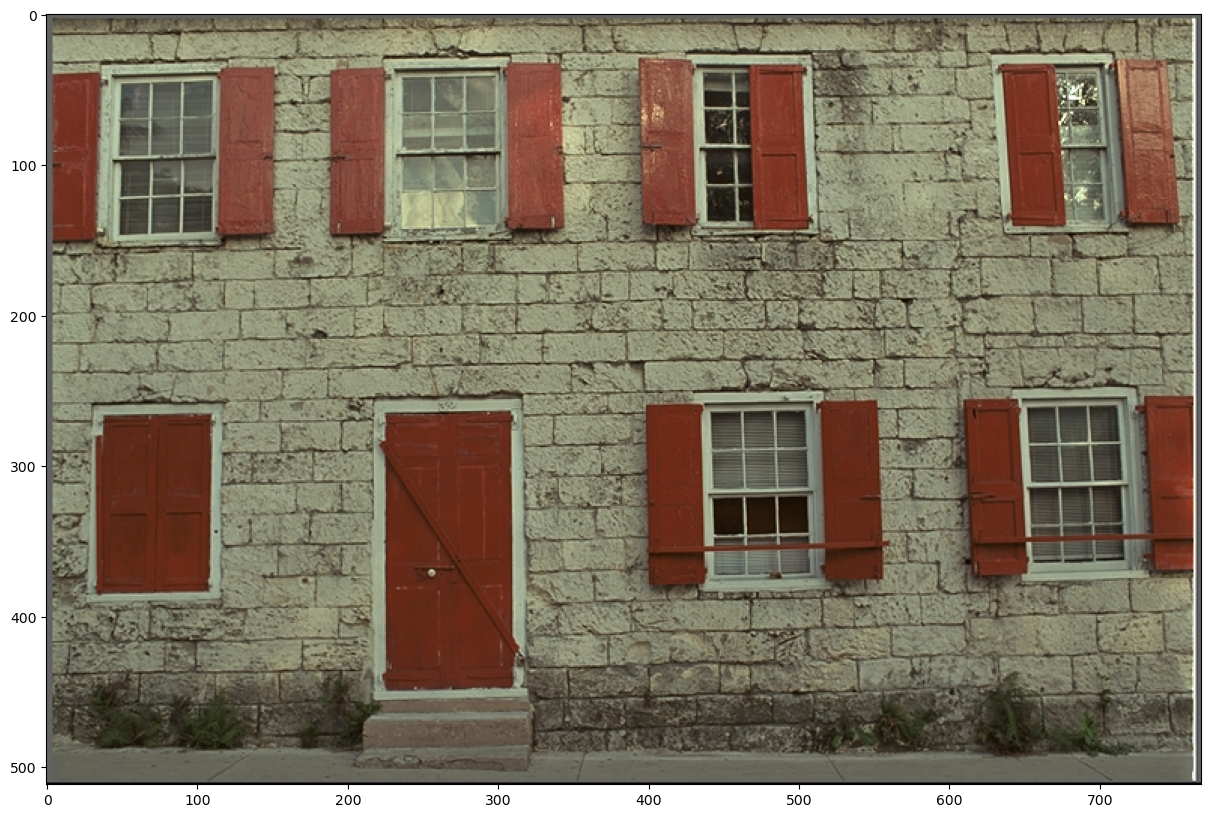

In [2]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x7faf2e0f33a0>)

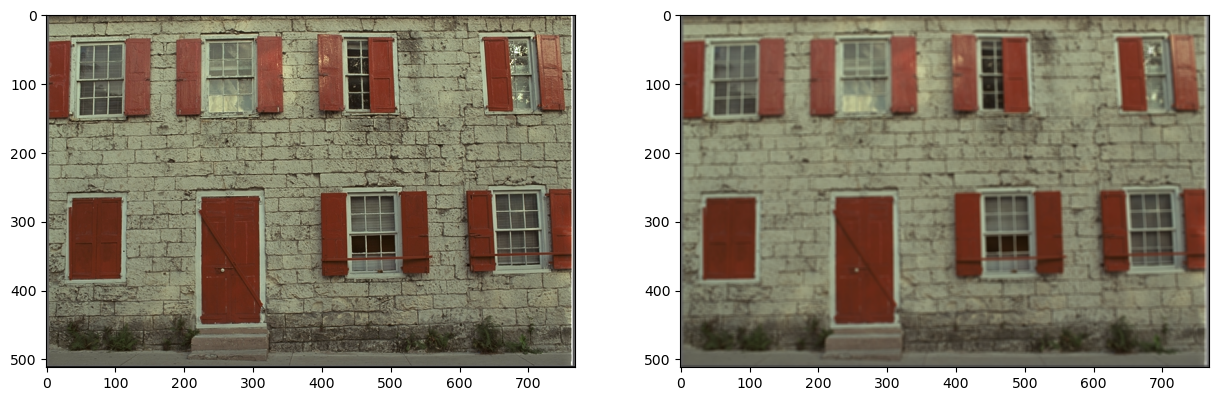

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)

unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(unsharp)

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

diff = (img / 255).astype(float) - (unsharp / 255).astype(float)

(<Axes: >, <matplotlib.image.AxesImage at 0x7faf2cea59f0>)

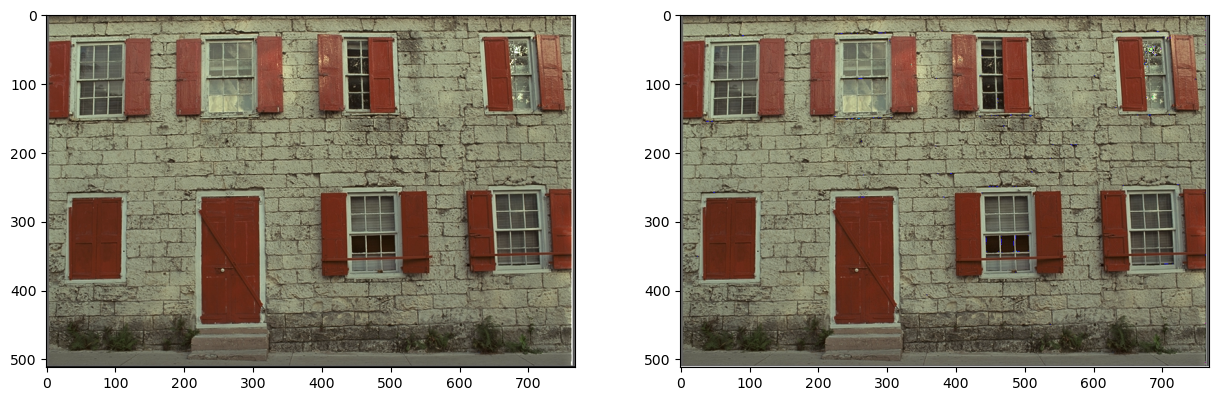

In [12]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

sharpened = img.astype(float) + diff * 5
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow((sharpened).astype(np.uint8))

### Questions

 * What is a good (reasonable) value for the `amount` parameter?

Amount controls the overall strength of the sharpening effect, and is usually listed as a percentage. A good starting point is often a value of 100%.
Wikipedia says, that amount of 50–150% was recommended.

I enjoy my result with amount = 1.75, which is founded by experimental way.

 * What happens if it is too small?

I can not see the difference, but think, if `amount` parameter is too small, USM leave original image as it is. Because diff -> 0

(<Axes: >, <matplotlib.image.AxesImage at 0x7f7f3ca721a0>)

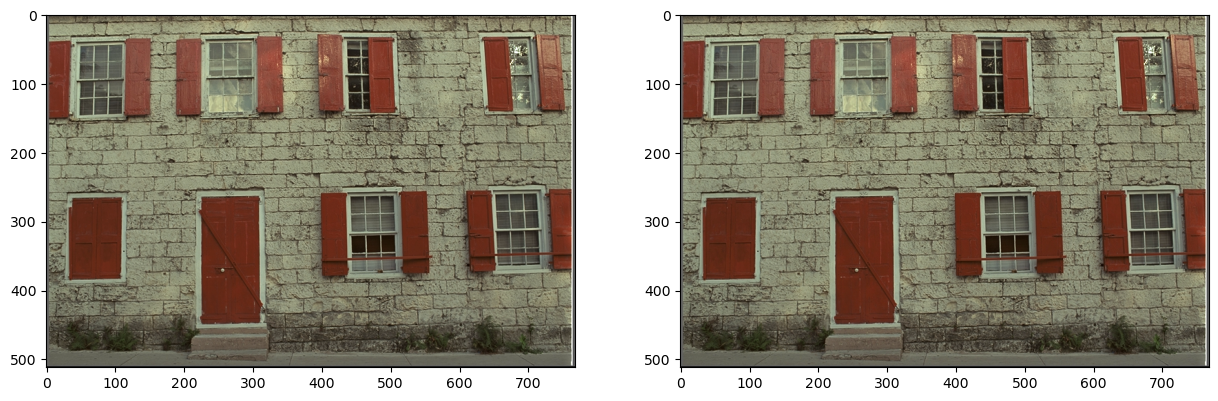

In [71]:
diff_small = (img / 255).astype(float) - (unsharp / 255).astype(float)
sharpened_small = img.astype(float) + diff_small * 0.001
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow((sharpened_small).astype(np.uint8))

 * What happens if it is too large?
 
I see noise in right top window and clearer boundaries. Diff is too high, so we include more extra information to original image.

(<Axes: >, <matplotlib.image.AxesImage at 0x7f7f3cc1f670>)

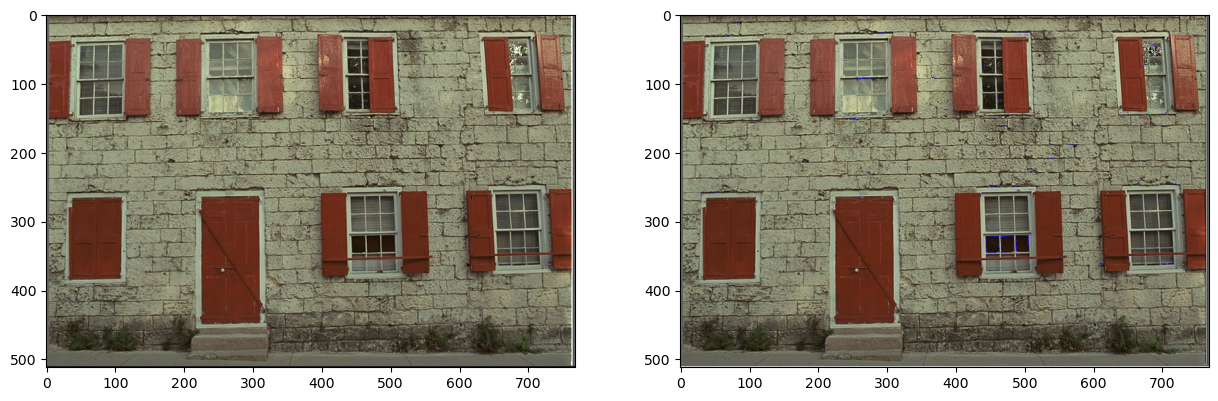

In [72]:
diff_small = (img / 255).astype(float) - (unsharp / 255).astype(float)
sharpened_small = img.astype(float) + diff_small * 20
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow((sharpened_small).astype(np.uint8))